In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
# skiprows：读取数据时跳过的行数。
# 数据的第一行是描述信息，因此使用skiprows跳过。第二行才是标题数据。
# id（贷款人编号）与next_pymnt_d（下一个预定的还款日期）列存在混合类型，显式指定列的类型，这样效率更高。
# Pandas默认以块的形式处理（解析）数据，从而降低内存消耗，但是可能会解析出混合类型。可以使用两种方式来处理：
# 1 显式通过dtype来设置列的类型。
# 2 将low_memory参数的值设置为False（默认为True）。

data = pd.read_csv("Loan.csv", skiprows=1, dtype={"id": np.str, "next_pymnt_d": np.str})
# 默认情况下，只显示20列数据。
print(pd.get_option("max_columns"))
# 查看数据集的形状。
print(data.shape)
# 显式指定最大列数。如果为None，指不限制最大显示列数。
pd.set_option("max_columns", 120)
data.head(2)

D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


20
(42538, 111)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status   issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-2011   Fully Paid          n   
1     30000.0     Source Verified  Dec-2011  Charged Off          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0         Jan-1985             1.0   
1    309xx         GA   1.00          0.0         Apr-1999             5.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0    13648.0      83.7%        9.0                   f        0.0   
1     1687.0       9.4%        4.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5863.155187          5833.84          5000.00   
1            0.0  1014.530000          1014.53           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0         0.0                     0.00   
1         435.17                 0.0       122.9                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Jan-2015           171.62          NaN           Nov-2016   
1     Apr-2013           119.66          NaN           Oct-2016   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN          1.0   
1                         0.0                          NaN          1.0   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   
1             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  \
0          NaN           NaN                   NaN          NaN   
1          NaN           NaN                   NaN          NaN   

   bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0             NaN      NaN                       0.0          0.0   
1             NaN      NaN                       0.0          0.0   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op

In [3]:
# 删除与贷款无关特征。
irrelevant_coumns = ["id", "member_id", "funded_amnt", "funded_amnt_inv", "emp_title", "issue_d", "url", "desc", "zip_code", "addr_state", "last_credit_pull_d", "earliest_cr_line", "addr_state", "title", "last_pymnt_d"]
data.drop(irrelevant_coumns, axis=1, inplace=True)

# 删除相关性高的特征。
high_relevant = ["grade", "sub_grade"]
data.drop(high_relevant, axis=1, inplace=True)

In [4]:
# 默认情况下，最多只显示60行数据。
print(pd.get_option("max_rows"))
# 如果需要显示完整，可以设置最多显示的行数。
# pd.set_option("max_rows", 200)
miss = data.isnull().sum(axis=0)
miss = pd.concat([miss, miss * 100 / data.shape[0]], axis=1)
miss.columns = ["miss_num", "miss_rate"]
miss.sort_values("miss_num", inplace=True, ascending=False)
display(miss)

60


miss_num   miss_rate
mths_since_rcnt_il           42538  100.000000
mths_since_recent_bc_dlq     42538  100.000000
mort_acc                     42538  100.000000
mo_sin_rcnt_tl               42538  100.000000
mo_sin_rcnt_rev_tl_op        42538  100.000000
...                            ...         ...
collection_recovery_fee          3    0.007053
last_pymnt_amnt                  3    0.007053
policy_code                      3    0.007053
application_type                 3    0.007053
loan_amnt                        3    0.007053

[95 rows x 2 columns]

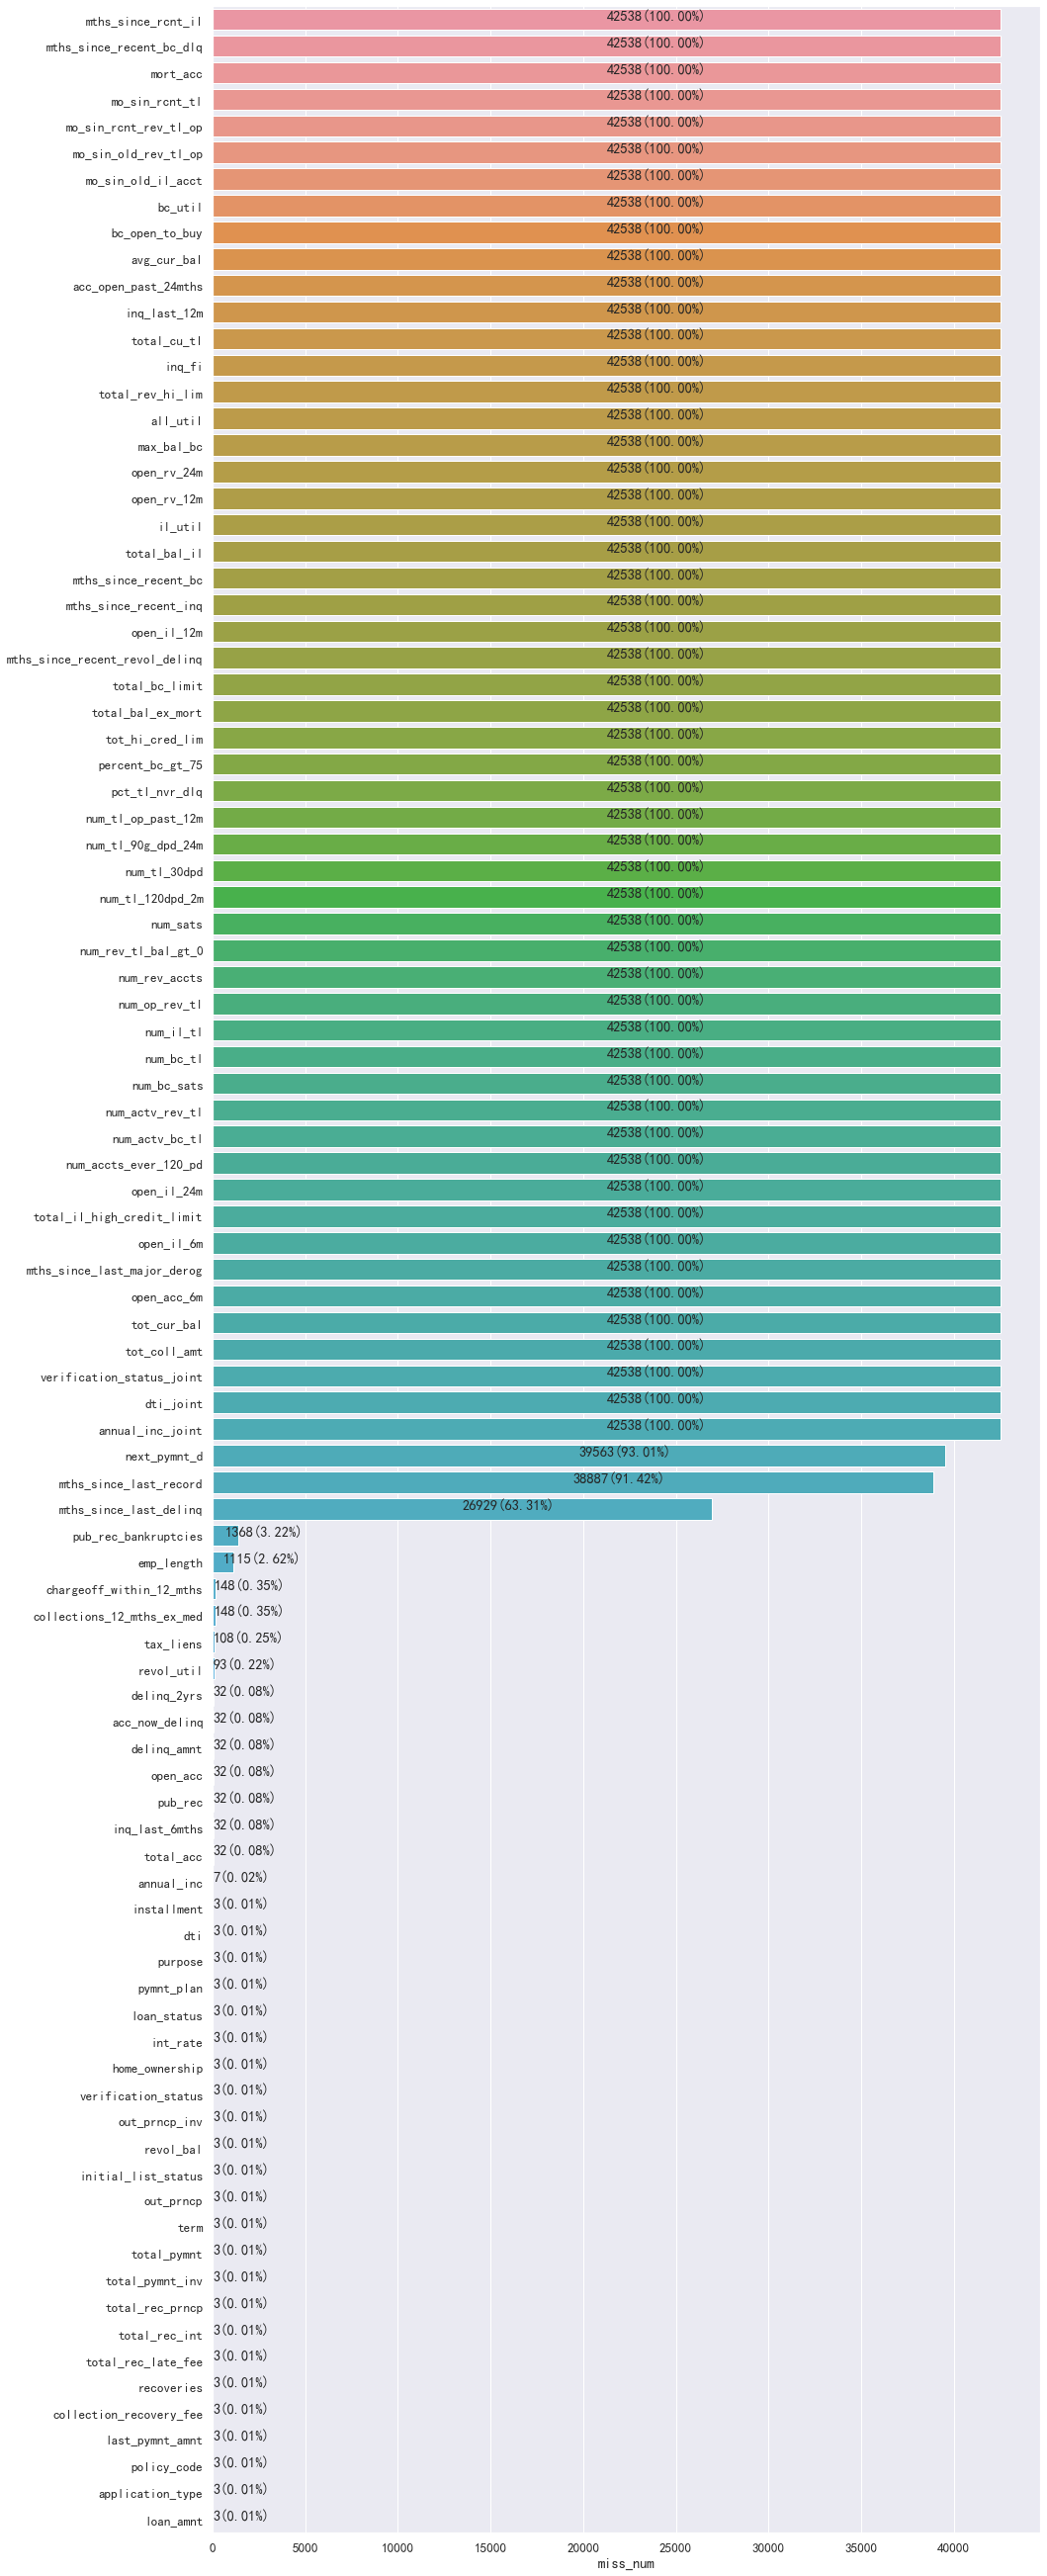

In [5]:
ax = sns.barplot(y=miss.index, x=miss["miss_num"])
figsize=(15, miss.shape[0] // 2)

ax.get_figure().set_size_inches(figsize)
for i in range(miss.shape[0]):
    num = miss["miss_num"].iloc[i]
    rate = miss["miss_rate"].iloc[i]
    ax.text(num / 2, i, f"{num}({rate:.2f}%)")

In [6]:
all_missing = miss[miss["miss_rate"] == 100].index
print("删除的特征：")
print(all_missing)
data.drop(all_missing, axis=1, inplace=True)

删除的特征：
Index(['mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mort_acc',
       'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'open_il_12m',
       'mths_since_recent_revol_delinq', 'total_bc_limit', 'total_bal_ex_mort',
       'tot_hi_cred_lim', 'percent_bc_gt_75', 'pct_tl_nvr_dlq',
       'num_tl_op_past_12m', 'num_tl_90g_dpd_24m', 'num_tl_30dpd',
       'num_tl_120dpd_2m', 'num_sats', 'num_rev_tl_bal_gt_0', 'num_rev_accts',
       'num_op_rev_tl', 'num_il_tl', 'num_bc_tl', 'num_bc_sats',
       'num_actv_rev_tl', 'num_actv_bc_tl', 'num_accts_ever_120_pd',
       'open_il_24m', 'total_il_high_credit_limit', 'open_il_6m',
       'mths_since_last_maj

In [7]:
miss_too_much = miss[(miss["miss_rate"] > 80) & (miss["miss_rate"] < 100)].index
print("缺失值过多的特征：")
print(miss_too_much)

缺失值过多的特征：
Index(['next_pymnt_d', 'mths_since_last_record'], dtype='object')


In [8]:
# next_pymnt_d：下一个计划的还款日期。
# mths_since_last_record：自上次记录以来的月数。
for c in miss_too_much:
    # 1与0只需要1个字节就可以存储。
    data[c] = data[c].isnull().astype(np.int8)
data.loc[:, miss_too_much].head()

next_pymnt_d  mths_since_last_record
0             1                       1
1             1                       1
2             1                       1
3             1                       1
4             0                       1

In [9]:
missing_medium = miss[(miss["miss_rate"] > 20) & (miss["miss_rate"] <= 80)].index
print("缺失值适中的特征：")
print(missing_medium)

缺失值适中的特征：
Index(['mths_since_last_delinq'], dtype='object')


In [10]:
# help(sns.distplot)

In [11]:
from scipy import stats
# 自借款人上次拖欠债务以来的月数。

D:\software\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='Density'>

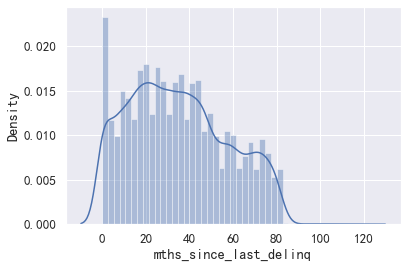

In [12]:
# sns.distplot(data["mths_since_last_delinq"])
sns.distplot(data["mths_since_last_delinq"].dropna())

In [13]:
stats.normaltest(data["mths_since_last_delinq"].dropna())

NormaltestResult(statistic=1979.824429462228, pvalue=0.0)

In [14]:
# 建立辅助特征，用来标记特征原有的值是否缺失。
data["mths_since_last_delinq_indicator"] = data["mths_since_last_delinq"].isnull().astype(np.int8)
# 计算中位数，并填充缺失值。
m = data["mths_since_last_delinq"].median()
data["mths_since_last_delinq"].fillna(m, inplace=True)

In [15]:
missing_less = miss[(miss["miss_rate"] > 0) & (miss["miss_rate"] <= 20)].index
print("缺失值较少的特征：")
print(missing_less)

缺失值较少的特征：
Index(['pub_rec_bankruptcies', 'emp_length', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'tax_liens', 'revol_util', 'delinq_2yrs',
       'acc_now_delinq', 'delinq_amnt', 'open_acc', 'pub_rec',
       'inq_last_6mths', 'total_acc', 'annual_inc', 'installment', 'dti',
       'purpose', 'pymnt_plan', 'loan_status', 'int_rate', 'home_ownership',
       'verification_status', 'out_prncp_inv', 'revol_bal',
       'initial_list_status', 'out_prncp', 'term', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type', 'loan_amnt'],
      dtype='object')


In [16]:
data.dropna(inplace=True)
#缺失值处理完成后，我们再次来进行检查。
(data.isnull().sum() > 0).any()

False

In [17]:
data.duplicated().sum()
# data.drop_duplicates(inplace=True)

0

In [18]:
not_number = []
for k, v in data.dtypes.items():
    if not np.issubdtype(v, np.number):
        not_number.append(k)
print("非数值变量：")
print(not_number)

非数值变量：
['term', 'int_rate', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'revol_util', 'initial_list_status', 'application_type']


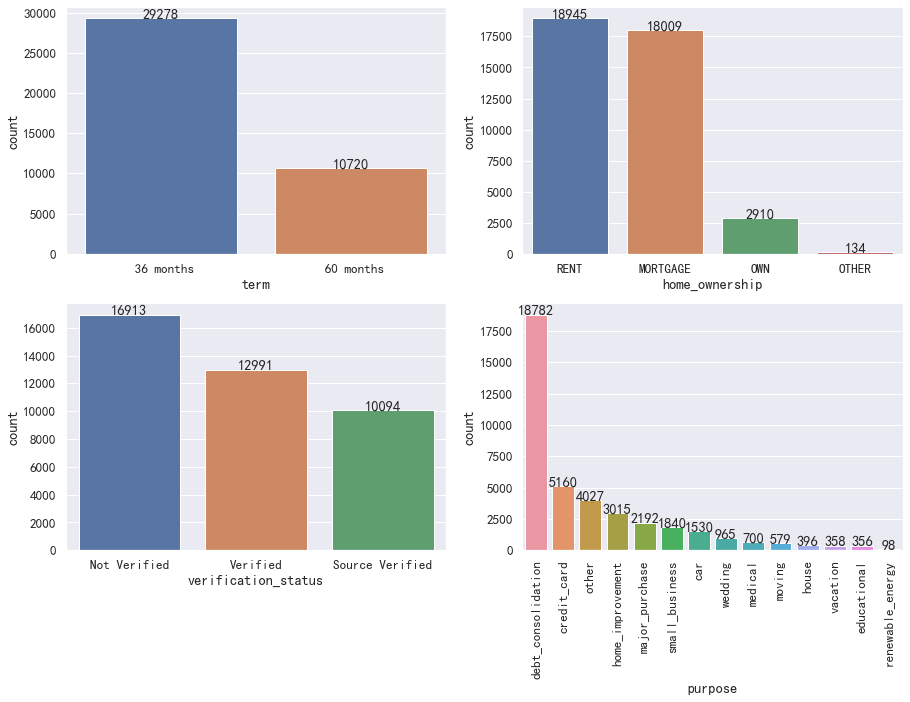

In [19]:
def plot_var(name_list):
    """绘制变量的每个类别的数量。
    Parameters
    ----------
    name : str
    变量的名称。
    """
    num = len(name_list)
    row, col = np.ceil(num / 2).astype(np.int32), 2
    fig, ax = plt.subplots(row, col)
    fig.set_size_inches(15, row * 5)
    ax = ax.ravel()
    for index, name in enumerate(name_list):
        v = data[name].value_counts()
        sns.countplot(x=name, data=data, order=v.index, ax=ax[index])
        # 在图像上绘制数值。
        for x, y in enumerate(v):
            t = ax[index].text(x, y, y)
            # 数值居中对齐。
            t.set_ha("center")
        if len(v) > 10:
            ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=90)
            
plot_var(["term", "home_ownership", "verification_status", "purpose"])

In [20]:
columns = ["term", "home_ownership", "verification_status", "purpose"]
dummy = pd.get_dummies(data[columns])
display(dummy.head())
data = pd.concat([data, dummy], axis=1)
data = data.drop(columns, axis=1)

term_ 36 months  term_ 60 months  home_ownership_MORTGAGE  \
0                1                0                        0   
1                0                1                        0   
2                1                0                        0   
3                1                0                        0   
4                0                1                        0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   0                    1   
2                     0                   0                    1   
3                     0                   0                    1   
4                     0                   0                    1   

   verification_status_Not Verified  verification_status_Source Verified  \
0                                 0                                    0   
1                                 0                                    1   
2                                 1                                    0   
3                                 0                                    1   
4                                 0                                    1   

   verification_status_Verified  purpose_car  purpose_credit_card  \
0                             1            0                    1   
1                             0            1                    0   
2                             0            0                    0   
3                             0            0                    0   
4                             0            0                    0   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                           0                    0                         0   
1                           0                    0                         0   
2                           0                    0                         0   
3                           0                    0                         0   
4                           0                    0                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0              0                       0                0               0   
1              0                       0                0               0   
2              0                       0                0               0   
3              0                       0                0               0   
4              0                       0                0               0   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0              0                         0                       0   
1              0                         0                       0   
2              0                         0                       1   
3              1                         0                       0   
4              1                         0                       0   

   purpose_vacation  purpose_wedding  
0                 0                0  
1                 0                0  
2                 0                0  
3                 0                0  
4                 0                0

In [21]:
# 也可以使用map或者apply方法来实现相同的功能。
data["int_rate"] = data["int_rate"].str.replace("%", "").astype(np.float32)
data["revol_util"] = data["revol_util"].str.replace("%", "").astype(np.float32)

In [22]:
map_dict = {
"10+ years": 10, "9 years": 9, "8 years": 8,
"7 years": 7, "6 years": 6, "5 years": 5,
"4 years": 4, "3 years": 3, "2 years": 2,
"1 year": 1, "< 1 year": 0
} 
data["emp_length"] = data["emp_length"].map(map_dict)

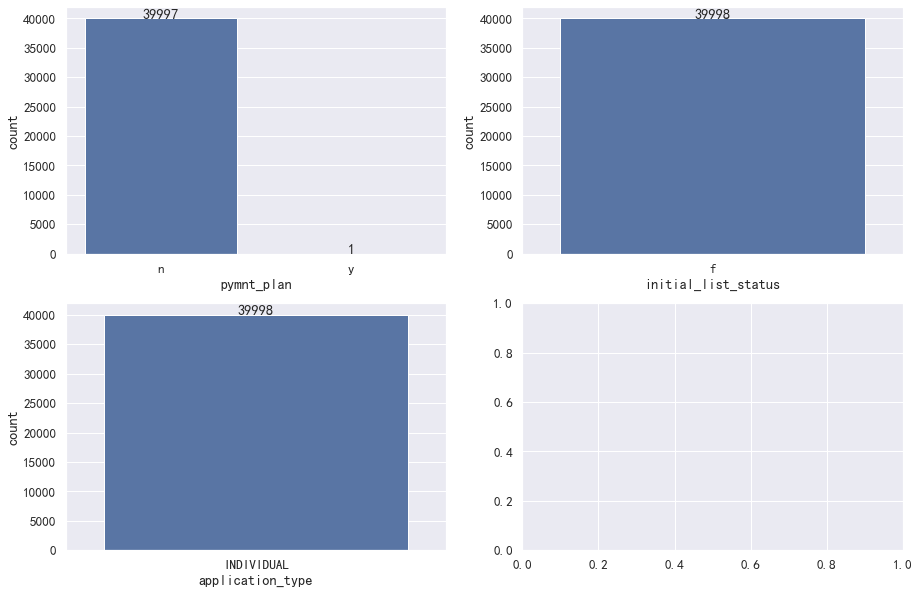

In [23]:
plot_var(["pymnt_plan", "initial_list_status", "application_type"])

In [24]:
data.drop(["pymnt_plan", "initial_list_status", "application_type"], axis=1, inplace=True)

In [25]:
data["loan_status"].value_counts()

Fully Paid                                             32447
Charged Off                                             5294
Does not meet the credit policy. Status:Fully Paid      1507
Does not meet the credit policy. Status:Charged Off      529
Current                                                  196
Late (31-120 days)                                        10
In Grace Period                                            9
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

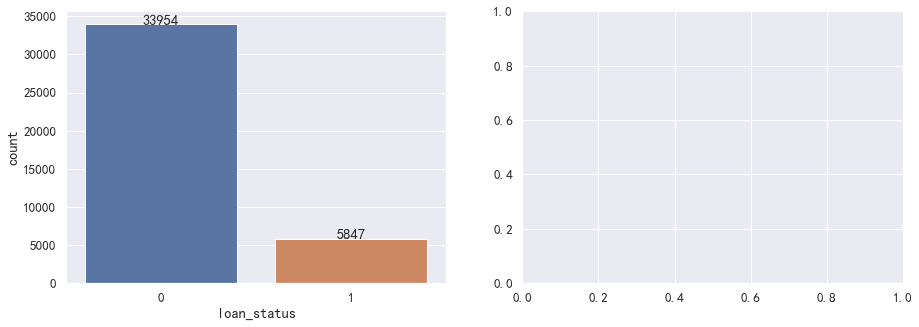

In [26]:
def mapping(key):
    if "Fully Paid" in key:
        return 0
    else:
        return 1

# 选择正常还款与延期的记录。
data = data.loc[(data["loan_status"] != "Current") & (data["loan_status"] != "Default")]
data["loan_status"] = data["loan_status"].map(mapping)
plot_var(["loan_status"])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression(solver="liblinear")
y = data["loan_status"]
X = data.drop("loan_status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print("真实值：", y_test.values[:10])
print("预测值：", y_hat[:10])

真实值： [0 0 1 0 0 0 0 1 0 0]
预测值： [0 0 1 0 0 0 0 1 0 0]


In [28]:
from sklearn.metrics import confusion_matrix
# 根据传入的真实值与预测值，创建混淆矩阵。
matrix = confusion_matrix(y_true=y_test, y_pred=y_hat)
print(matrix)

[[10205     8]
 [   60  1668]]


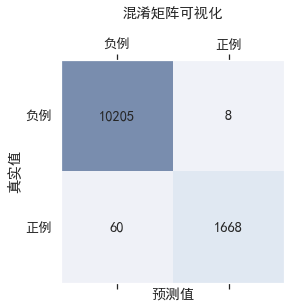

In [29]:
mat = plt.matshow(matrix, cmap=plt.cm.Blues, alpha=0.5)
label = ["负例", "正例"]
# 获取当前的绘图对象。
ax = plt.gca()
# 可以一次性设置多个属性。
ax.set(xticks=np.arange(matrix.shape[1]), yticks=np.arange(matrix.shape[0]), xticklabels=label, yticklabels=label, title="混淆矩阵可视化\n", ylabel="真实值", xlabel="预测值")
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i, s=matrix[i, j], va="center", ha="center")
plt.grid(False)
# Matplotlib 3.1.1版本需要添加如下的代码，否则可视化显示不完整。（bug）
# a, b = ax.get_ylim()
# ax.set_ylim(a + 0.5, b - 0.5)
# plt.show()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("正确率：", accuracy_score(y_test, y_hat))
# 默认将1类别视为正例，可以通过pos_label参数指定。
print("精准率：", precision_score(y_test, y_hat))
print("召回率：", recall_score(y_test, y_hat))
print("F1调和平均值：", f1_score(y_test, y_hat))
# 我们也可以调用逻辑回归模型对象的score方法，也能获取正确率。
# 但是需要注意，score方法与正确率（accuracy_score）函数的参数是不同的。
print("score方法计算正确率：", lr.score(X_test, y_test))

正确率： 0.9943053345615945
精准率： 0.9952267303102625
召回率： 0.9652777777777778
F1调和平均值： 0.9800235017626322
score方法计算正确率： 0.9943053345615945


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10213
           1       1.00      0.97      0.98      1728

    accuracy                           0.99     11941
   macro avg       0.99      0.98      0.99     11941
weighted avg       0.99      0.99      0.99     11941



In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_hat)

array([[10205,     8],
       [   60,  1668]], dtype=int64)

In [36]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

probo = lr.predict_proba(X_test)
# 返回ROC曲线相关值。返回FPR，TPR与阈值。当分值达到阈值时，将样本判定为正类，
# 否则判定为负类。
# y_true：二分类的标签值（真实值）。
# y_score：每个标签（数据）的分值或概率值。当该值达到阈值时，判定为正例，否则判定为负例。
# 在实际模型评估时，该值往往通过决策函数（decision_function）或者概率函数（predict_proba）获得。
# pos_label：指定正例的标签值。
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=probo[:, 1], pos_label=1)
# 对概率降序排列，然后从中选择若干元素作为阈值，每个阈值下，都可以计算一个tpr与fpr，
# 每个tpr与fpr对应ROC曲线上的一个点，将这些点进行连接，就可以绘制ROC曲线。
print(probo.shape, fpr.shape, tpr.shape, thresholds.shape)
print(thresholds[:10])
# auc与roc_auc_score函数都可以返回AUC面积值，但是注意，两个函数的参数是不同的。
print("AUC面积值：", auc(fpr, tpr))
print("AUC面积得分：", roc_auc_score(y_true=y_test, y_score=probo[:, 1]))

(11941, 2) (112,) (112,) (112,)
[2. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
AUC面积值： 0.9965009193076363
AUC面积得分： 0.9965009193076363


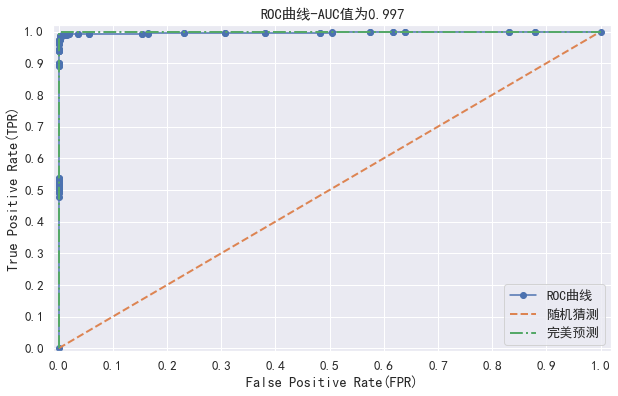

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker="o", label="ROC曲线")
plt.plot([0,1], [0,1], lw=2, ls="--", label="随机猜测")
plt.plot([0, 0, 1], [0, 1, 1], lw=2, ls="-.", label="完美预测")
plt.xlim(-0.01, 1.02)
plt.ylim(-0.01, 1.02)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.grid(True)
plt.title(f"ROC曲线-AUC值为{auc(fpr, tpr):.3f}")
plt.legend()
plt.show()

[0.16129936 0.16122106 0.16123611 ... 1.         1.         1.        ]
[1.         0.9994213  0.9994213  ... 0.49074074 0.47800926 0.        ]
(9837,) (9837,) (9836,) (11941,)


Text(0.5, 1.0, 'P-R曲线')

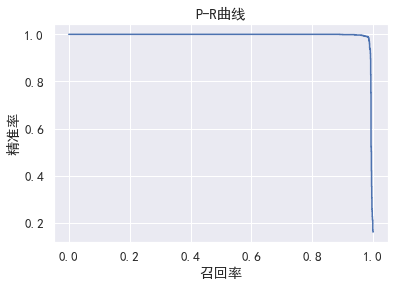

In [38]:
from sklearn.metrics import precision_recall_curve
# 计算在不同阈值下的精准率与召回率。
# y_true：每个样本的真实值。
# probas_pred：每个样本的概率值（或z值）。
# pos_label：指定正例类别。
# 函数会返回3个值：
# precision：每个样本在对应阈值下的精准率，最后一个元素值为1。
# recall：每个样本在对应阈值下的召回率。最后一个元素值为0。
# thresholds：升序排列的阈值数组。【说明：因为阈值是升序排列的，因此，可以推导出
# 精准率升序排列，召回率降序排列。】
precision, recall, thresholds = precision_recall_curve(y_test, probo[:, 1], pos_label=1)
print(precision)
print(recall)
# 阈值会从y_true参数的数组中来选取一部分。注意：阈值的数量比precision与recall少1。
print(precision.shape, recall.shape, thresholds.shape, y_test.shape)
plt.plot(recall, precision)
plt.xlabel("召回率")
plt.ylabel("精准率")
plt.title("P-R曲线")

In [39]:
min_recall = 0.95
# 召回率降序排列，截取的一定是数组中的前半部分。
boundary_index = recall[recall >= min_recall].shape[0]
pre = precision[:boundary_index]
rec = recall[:boundary_index]
thr = thresholds[:boundary_index]
f1 = (2 * pre * rec) / (pre + rec)
index = f1.argmax()
print("最佳阈值：", thr[index])
print("最佳F1值：", f1.max())
print("最佳F1值时的精准率：", pre[index])
print("最佳F1值时的召回率：", rec[index])

最佳阈值： 0.18054451232474056
最佳F1值： 0.98664343786295
最佳F1值时的精准率： 0.9900932400932401
最佳F1值时的召回率： 0.9832175925925926


Text(0.5, 1.0, 'KS曲线')

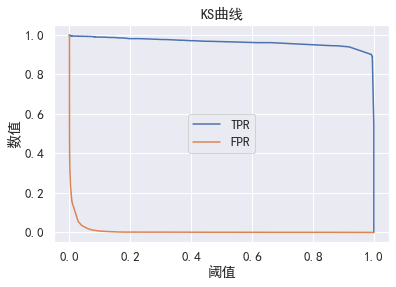

In [40]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=probo[:, 1], pos_label=1)
# roc_curve中，thresholds索引为0的元素值会大于1，为了能够正常显示，
# 将thresholds索引为0的元素修改为1。
thresholds[0] = 1
plt.plot(thresholds, tpr, label="TPR")
plt.plot(thresholds, fpr, label="FPR")
plt.legend()
plt.xlabel("阈值")
plt.ylabel("数值")
plt.title("KS曲线")

In [41]:
diff = tpr - fpr
index = diff.argmax()
print("最大差值位置：", index)
print("对应的阈值：", thresholds[index])

最大差值位置： 60
对应的阈值： 0.15330934815825106
